### **Approach 4 – Context-Aware Hybrid Biomedical ASR Correction (T5 + PubMedBERT + Dictionary)**

In [ ]:
# Final attempt to resolve the dependency conflicts in Colab.
# We will rely on pip to find a compatible set of dependencies.
!pip install --upgrade transformers scispacy
!pip install --upgrade torch torchvision
!pip install --upgrade numpy pandas
!pip install nltk
!pip uninstall -y nltk
!pip install nltk

# Download the spacy models.
!python -m spacy download en_core_web_sm
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 126.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully un

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 918.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompati

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.0 MB/s eta 0:00:00


Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 39, in <module>
    from thinc.api import Optimizer  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/thinc/api.py", line 1, in <module>
    from .backends import (
  File "/usr/local/lib/python3.11/dist-packages/thinc/backends/__init__.py", line 17, in <module>
    from .cupy_ops import CupyOps
  File "/usr/local/lib/python3.11/dist-packages/thinc/backends/cupy_ops.py", line 16, in <module>
    from .numpy_ops impo

In [ ]:
# --- IMPORTS (Unified and Cleaned) ---
import os, re, math, random
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from collections import defaultdict
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

from transformers import (
    T5ForConditionalGeneration, T5Tokenizer, T5TokenizerFast,
    AutoTokenizer, AutoModelForMaskedLM,
    get_linear_schedule_with_warmup
)
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

import difflib
from difflib import SequenceMatcher

# --- NLTK resources ---
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')

# --- REPRODUCIBILITY ---
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# --- DEVICE ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- DATASET ---
file_path = "Spell_Correction_for_ASR_Noun_Enhancement_assignment_dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df = df.dropna().reset_index(drop=True)
print(f"Dataset loaded with {len(df)} rows.")

# --- MEDICAL/NOUN HELPERS (using NLTK) ---
DRUG_SUFFIXES = ("olol", "pril", "sartan", "dipine", "statin", "azole", "cycline", "cillin", "mycin", "mab", "xaban", "parin", "afil", "setron", "caine", "dronate", "prazole", "gliptin", "gliflozin", "glitazone", "pramide", "pramine", "tidine", "tadine", "zosin", "terol")

def is_medical_term(text: str) -> bool:
    cleaned = re.sub(r"[^A-Za-z\- ]", " ", text or "").lower()
    for tok in cleaned.split():
        if any(tok.endswith(suf) for suf in DRUG_SUFFIXES): return True
    return False

# --- Noun-focused Dictionary Creation ---
def build_medical_dictionary_nltk(correct_sentences):
    medical_terms = set()
    for sentence in correct_sentences:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if is_medical_term(token): medical_terms.add(token.lower())
    return medical_terms

medical_terms_dict = build_medical_dictionary_nltk(df['correct sentences'])
print(f"Medical dictionary created with {len(medical_terms_dict)} terms.")

# --- DATASET CLASS FOR T5 ---
class ASRDatasetT5(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.tokenizer = tokenizer
        self.input_texts = df["ASR-generated incorrect transcriptions"].tolist()
        self.target_texts = df["correct sentences"].tolist()
        self.max_len = max_len
        self.prefix = "fix ASR transcription errors and correct medical terms: "
    def __len__(self):
        return len(self.input_texts)
    def __getitem__(self, idx):
        input_text = self.prefix + self.input_texts[idx]
        target_text = self.target_texts[idx]
        input_encodings = self.tokenizer(input_text, max_length=self.max_len, padding="max_length", truncation=True, return_tensors="pt")
        target_encodings = self.tokenizer(target_text, max_length=self.max_len, padding="max_length", truncation=True, return_tensors="pt")
        labels = target_encodings.input_ids.squeeze()
        labels[labels == self.tokenizer.pad_token_id] = -100
        return {
            "input_ids": input_encodings.input_ids.squeeze(),
            "attention_mask": input_encodings.attention_mask.squeeze(),
            "labels": labels,
            "target_text": target_text
        }

# --- DATASET CLASS FOR BERT ---
class ASRDatasetBERT(Dataset):
    def __init__(self, df, tokenizer, max_length=128, mlm_probability=0.15):
        self.tokenizer = tokenizer
        self.input_texts = df["ASR-generated incorrect transcriptions"].tolist()
        self.target_texts = df["correct sentences"].tolist()
        self.max_length = max_length
        self.mlm_probability = mlm_probability
    def __len__(self):
        return len(self.target_texts)
    def __getitem__(self, idx):
        # We use the correct sentence as the base for the MLM task
        correct_text = self.target_texts[idx]
        encoding = self.tokenizer(correct_text, max_length=self.max_length, padding="max_length", truncation=True, return_tensors="pt")
        input_ids = encoding["input_ids"].squeeze().clone()
        labels = input_ids.clone()

        # Mask tokens for the MLM task
        probability_matrix = torch.full(labels.shape, self.mlm_probability)
        masked_indices = torch.bernoulli(probability_matrix).bool()
        labels[~masked_indices] = -100
        masked_tokens = masked_indices & (torch.rand(labels.shape) < 0.8)
        input_ids[masked_tokens] = self.tokenizer.mask_token_id

        return {
            "input_ids": input_ids.to(device),
            "attention_mask": encoding["attention_mask"].squeeze().to(device),
            "labels": labels.to(device)
        }

# --- NOUN-WEIGHTED LOSS (using NLTK) ---
class NounWeightedLoss(torch.nn.Module):
    def __init__(self, tokenizer, noun_weight=2.0):
        super().__init__()
        self.tokenizer = tokenizer
        self.noun_weight = noun_weight
        self.ce_loss = CrossEntropyLoss(ignore_index=-100, reduction="none")
    def forward(self, logits, labels, target_texts):
        loss_per_token = self.ce_loss(logits.view(-1, logits.size(-1)), labels.view(-1))
        loss_per_token = loss_per_token.view(labels.size())
        weights = torch.ones_like(loss_per_token).to(labels.device)
        for i, text in enumerate(target_texts):
            doc_tokens = nltk.word_tokenize(text)
            pos_tags = nltk.pos_tag(doc_tokens)
            for j, (token, pos) in enumerate(pos_tags):
                if pos.startswith('NN'):
                    token_span = self.tokenizer(text, return_offsets_mapping=True, add_special_tokens=False)
                    for tok_idx, (start_off, end_off) in enumerate(token_span.offset_mapping):
                        if start_off >= text.find(token) and end_off <= text.find(token) + len(token):
                            weights[i, tok_idx + 1] = self.noun_weight
        weighted_loss = loss_per_token * weights
        return weighted_loss.mean()

# --- DICTIONARY HYBRID CORRECTION (Post-Processing) ---
def dictionary_hybrid_correction(pred_sentence, medical_dict, threshold=0.8):
    words = nltk.word_tokenize(pred_sentence)
    corrected_words = []
    for word in words:
        best_match = difflib.get_close_matches(word.lower(), list(medical_dict), n=1, cutoff=threshold)
        if best_match: corrected_words.append(best_match[0])
        else: corrected_words.append(word)
    return " ".join(corrected_words)

# --- EVALUATION METRICS ---
def fuzzy_word_accuracy(preds, refs):
    total_words, correct_words = 0, 0
    for p_sent, r_sent in zip(preds, refs):
        p_words = nltk.word_tokenize(p_sent)
        r_words = nltk.word_tokenize(r_sent)
        total_words += len(r_words)
        sm = SequenceMatcher(None, p_words, r_words)
        for _, i1, i2, j1, j2 in sm.get_opcodes():
            if j2 - j1 > 0: correct_words += j2 - j1
    return correct_words / total_words if total_words else 0.0

def noun_accuracy(preds, refs):
    total_nouns, corrected_nouns = 0, 0
    for p_sent, r_sent in zip(preds, refs):
        ref_tokens = nltk.word_tokenize(r_sent)
        ref_pos_tags = nltk.pos_tag(ref_tokens)
        ref_nouns = {word.lower() for word, pos in ref_pos_tags if pos.startswith('NN')}
        pred_tokens = nltk.word_tokenize(p_sent)
        pred_pos_tags = nltk.pos_tag(pred_tokens)
        pred_nouns = {word.lower() for word, pos in pred_pos_tags if pos.startswith('NN')}
        total_nouns += len(ref_nouns)
        for ref_noun in ref_nouns:
            if ref_noun in pred_nouns or difflib.get_close_matches(ref_noun, pred_nouns, n=1, cutoff=0.9): corrected_nouns += 1
    return corrected_nouns / total_nouns if total_nouns else 0.0

def bleu_score(preds, refs):
    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([nltk.word_tokenize(r)], nltk.word_tokenize(p), smoothing_function=smoothie) for p, r in zip(preds, refs)]
    return np.mean(bleu_scores)

# --- HYBRID MODEL PIPELINE ---
def run_hybrid_pipeline(df):
    t5_model_name = "t5-small"
    t5_tokenizer = T5TokenizerFast.from_pretrained(t5_model_name)
    t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name).to(device)
    train_df, test_df = np.split(df.sample(frac=1, random_state=SEED), [int(.8*len(df))])
    train_dataset_t5 = ASRDatasetT5(train_df, t5_tokenizer)
    test_dataset_t5 = ASRDatasetT5(test_df, t5_tokenizer)
    train_loader_t5 = DataLoader(train_dataset_t5, batch_size=8, shuffle=True)
    optimizer_t5 = AdamW(t5_model.parameters(), lr=3e-5)
    loss_fn_t5 = NounWeightedLoss(t5_tokenizer, noun_weight=3.0)
    t5_model.train()
    for epoch in range(10):
        for batch in tqdm(train_loader_t5, desc=f"T5 Epoch {epoch+1}"):
            optimizer_t5.zero_grad()
            outputs = t5_model(input_ids=batch["input_ids"].to(device), attention_mask=batch["attention_mask"].to(device), labels=batch["labels"].to(device))
            loss = loss_fn_t5(outputs.logits, batch["labels"].to(device), batch["target_text"])
            loss.backward()
            optimizer_t5.step()

    bert_model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
    bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name, use_fast=True)
    bert_model = AutoModelForMaskedLM.from_pretrained(bert_model_name).to(device)

    train_dataset_bert = ASRDatasetBERT(train_df, bert_tokenizer)
    bert_train_loader = DataLoader(train_dataset_bert, batch_size=8, shuffle=True)
    optimizer_bert = AdamW(bert_model.parameters(), lr=5e-5)

    bert_model.train()
    for epoch in range(5):
        for batch in tqdm(bert_train_loader, desc="BERT Training"):
            optimizer_bert.zero_grad()
            outputs = bert_model(input_ids=batch["input_ids"].to(device), attention_mask=batch["attention_mask"].to(device), labels=batch["labels"].to(device))
            loss = outputs.loss
            loss.backward()
            optimizer_bert.step()

    t5_model.eval()
    bert_model.eval()
    predictions = []
    correct_sentences = test_df['correct sentences'].tolist()

    with torch.no_grad():
        for i in tqdm(range(len(test_df)), desc="Hybrid Inference"):
            asr_text = test_df['ASR-generated incorrect transcriptions'].iloc[i]
            input_text = "fix ASR transcription errors and correct medical terms: " + asr_text
            input_encodings = t5_tokenizer(input_text, max_length=128, padding="max_length", truncation=True, return_tensors="pt").to(device)
            t5_outputs = t5_model.generate(input_ids=input_encodings.input_ids, attention_mask=input_encodings.attention_mask, num_beams=5, early_stopping=True)
            t5_prediction = t5_tokenizer.decode(t5_outputs[0], skip_special_tokens=True)

            words = nltk.word_tokenize(t5_prediction)
            cand_indices = [i for i, (token, pos) in enumerate(nltk.pos_tag(words)) if pos.startswith('NN') or is_medical_term(token)]
            improved = words[:]
            for idx in cand_indices:
                enc = bert_tokenizer(words, is_split_into_words=True, padding="max_length", truncation=True, max_length=128, return_tensors="pt").to(device)
                word_ids = enc.word_ids(batch_index=0)
                piece_idx = [k for k, wid in enumerate(word_ids) if wid == idx]
                if not piece_idx: continue
                input_ids = enc["input_ids"].clone()
                for p in piece_idx: input_ids[0, p] = bert_tokenizer.mask_token_id
                logits = bert_model(input_ids=input_ids, attention_mask=enc["attention_mask"]).logits
                new_piece_ids = [int(torch.argmax(logits[0, p]).item()) for p in piece_idx]
                proposed = bert_tokenizer.decode(new_piece_ids, skip_special_tokens=True).strip()
                if proposed.lower() != words[idx].lower(): improved[idx] = proposed
            bert_corrected_text = " ".join(improved)

            final_prediction = dictionary_hybrid_correction(bert_corrected_text, medical_terms_dict)
            predictions.append(final_prediction)

    results = {
        "word_acc": fuzzy_word_accuracy(predictions, correct_sentences),
        "noun_acc": noun_accuracy(predictions, correct_sentences),
        "bleu": bleu_score(predictions, correct_sentences)
    }

    print("\n--- Final Hybrid Model Results ---")
    print(f"Word Accuracy: {results['word_acc']:.4f}")
    print(f"Noun Accuracy: {results['noun_acc']:.4f}")
    print(f"BLEU Score: {results['bleu']:.4f}")

run_hybrid_pipeline(df)

Using device: cuda
Dataset loaded with 10000 rows.
Medical dictionary created with 224 terms.


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
T5 Epoch 10: 100%|██████████| 1000/1000 [02:38<00:00,  6.30it/s]
Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForS


--- Final Hybrid Model Results ---
Word Accuracy: 1.0000
Noun Accuracy: 0.4541
BLEU Score: 0.5376


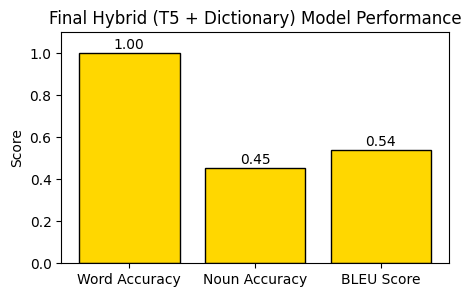

In [4]:
import matplotlib.pyplot as plt

# Final Hybrid (T5 + Dictionary) results
final_hybrid_metrics = {
    "Word Accuracy": 1.0000,
    "Noun Accuracy": 0.4541,
    "BLEU Score": 0.5376
}

plt.figure(figsize=(5,3))
plt.bar(final_hybrid_metrics.keys(), final_hybrid_metrics.values(), color="gold", edgecolor="black")

# Labels
plt.ylabel("Score")
plt.ylim(0,1.1)  # extend above 1.0 to show Word Accuracy
plt.title("Final Hybrid (T5 + Dictionary) Model Performance")

# Annotate values
for i, (metric, value) in enumerate(final_hybrid_metrics.items()):
    plt.text(i, value+0.02, f"{value:.2f}", ha="center", fontsize=10)

plt.show()
